# Artificial Neural Network

## Part 1 - Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib

## Part 2 - Importing the dataset

In [3]:
dataset = pd.read_excel('Pressure.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_type        546 non-null    object 
 1   Charge_size        546 non-null    float64
 2   Standoff_distance  546 non-null    float64
 3   Incident_pressure  546 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.2+ KB


## Part 3 -  Preprocessing

### Convert categorical variable into dummy variables

In [4]:
dataset = pd.get_dummies(dataset, columns=['Charge_type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_size        546 non-null    float64
 1   Standoff_distance  546 non-null    float64
 2   Incident_pressure  546 non-null    float64
 3   Charge_type_CompB  546 non-null    uint8  
 4   Charge_type_TNT    546 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 14.0 KB


In [4]:
dataset.head()

,Charge_size,Standoff_distance,Incident_pressure,Charge_type_CompB,Charge_type_TNT
0,0.5,1.5,283.258,0,1
1,0.5,2.5,163.904,0,1
2,0.5,3.5,135.678,0,1
3,0.5,4.5,124.039,0,1
4,0.5,5.5,117.856,0,1


### Dividing the dataset into independent and depenedent varibales

In [5]:
y = dataset['Incident_pressure']
X = dataset.drop('Incident_pressure', axis=1)
print(X.shape, y.shape)

(546, 4) (546,)


### Convert to numpy array

In [6]:
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size = 0.5, random_state = 20)

## Part 4 - Building the ANN

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=200, input_shape=(X_train.shape[1],), activation='relu'))

### Adding the second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=125, activation='relu'))

### Adding the third hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### Model summary

In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 125)               25125     
                                                                 
 dense_2 (Dense)             (None, 50)                6300      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32,476
Trainable params: 32,476
Non-trainable params: 0
_________________________________________________________________


## Part 5 - Training the ANN

### Compiling the ANN

In [14]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

### Early stopping callback

In [15]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [16]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=60,
                    verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 29ms/step - loss: 821141.8750 - mae: 334.2036 - val_loss: 597894.0000 - val_mae: 247.1685
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 729578.0625 - mae: 356.5981 - val_loss: 563093.4375 - val_mae: 361.5642
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 686616.3125 - mae: 370.8875 - val_loss: 509888.0625 - val_mae: 295.9883
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 627405.0000 - mae: 311.0883 - val_loss: 463398.1250 - val_mae: 277.4633
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 561042.5000 - mae: 309.1911 - val_loss: 414369.3125 - val_mae: 288.2788
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 513623.4062 - mae: 329.8443 - val_loss: 358015.5000 - val_mae: 268.8888
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 419314.2500 - mae: 255.6275 - val_loss: 308484.8750 - val_mae: 208.066

### Analyse learn history

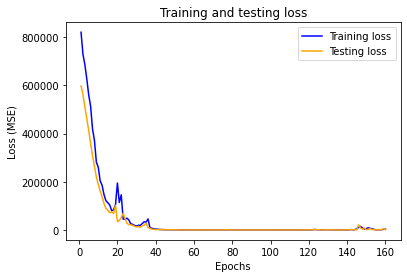

In [17]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

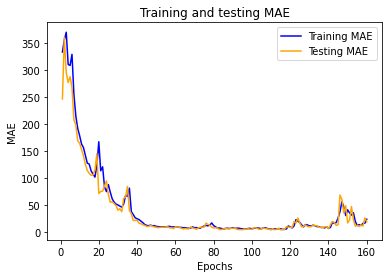

In [18]:
loss_values1 = history_dict['mae'] 
val_loss_values1 = history_dict['val_mae'] 
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Training MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Testing MAE')
plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [19]:
print (epochs)

range(1, 161)


### Save the Model

In [20]:
ann.save('ANN_pressure-4.h5')

## Part 6 - Evaluating predictions

In [9]:
from keras.models import load_model
ann = load_model('ANN_pressure-4.h5')

### Scatterplot of actual vs. pred

9/9 [==============================] - 0s 1ms/step


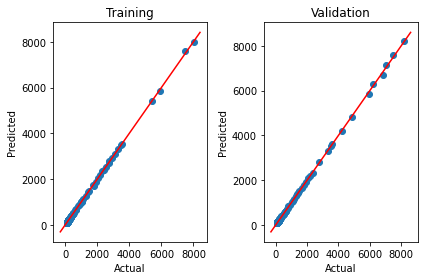

In [12]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=ann.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [13]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 2ms/step
[[ 109.39  107.57]
 [4808.27 4858.02]
 [ 104.27  103.64]
 [ 122.74  122.37]
 [ 115.92  116.57]
 [ 120.42  118.46]
 [ 594.17  585.96]
 [ 115.44  109.67]
 [ 560.28  540.43]
 [ 140.35  137.93]
 [ 128.51  131.18]
 [ 107.18  107.67]
 [ 109.56  109.4 ]
 [ 122.66  119.95]
 [ 110.91  110.56]
 [ 113.5   112.44]
 [ 124.03  125.77]
 [1277.41 1292.14]
 [ 140.15  141.75]
 [ 129.31  127.41]
 [ 112.94  110.91]
 [8218.7  8197.73]
 [ 231.07  242.76]
 [ 132.42  129.35]
 [ 590.86  606.76]
 [ 186.9   185.89]
 [ 158.04  156.44]
 [ 129.08  130.92]
 [1381.   1372.28]
 [ 116.81  115.43]
 [ 115.19  110.38]
 [ 150.6   151.21]
 [ 170.36  179.5 ]
 [ 144.79  147.74]
 [ 118.1   119.62]
 [ 107.16  105.85]
 [ 109.08  104.65]
 [ 111.95  108.6 ]
 [ 108.21  108.46]
 [ 213.38  215.56]
 [ 135.41  132.49]
 [ 134.89  135.33]
 [ 170.74  168.48]
 [ 162.74  163.81]
 [ 116.49  114.6 ]
 [ 201.29  233.4 ]
 [ 116.44  113.34]
 [ 132.04  129.54]
 [ 221.29  230.67]
 [ 121.87  120.81]

Text(0, 0.5, 'Predicted data')

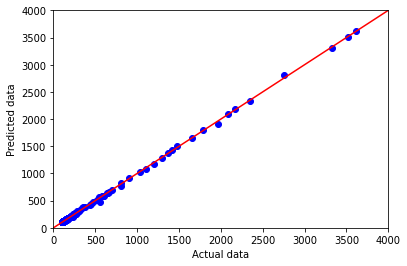

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,4000],[0,4000], color = "red")
plt.axis ([0,4000,0,4000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

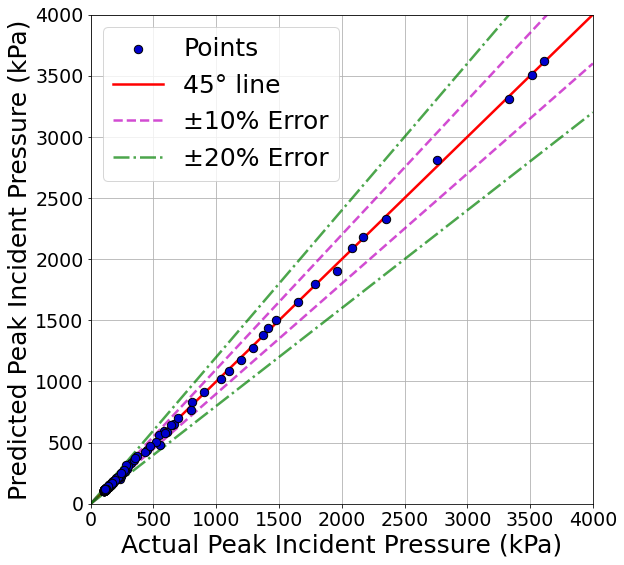

In [14]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 4000)
plt.xlim(0, 4000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

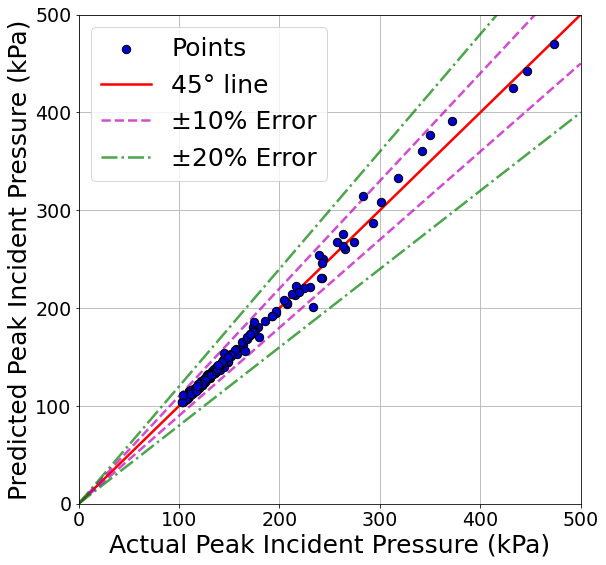

In [15]:
# Initialize layout
fig2, bx = plt.subplots(figsize = (9, 9))



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')




plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)



x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

### Performance Matrics

In [26]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

12/12 [==============================] - 0s 2ms/step
4.460832599739752
6.764391327686802


In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9997673084975852


In [28]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9998219129697835


In [29]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 98.90%
Within 20% margin 100.00%
Out of 20% margin 0.00%


In [30]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9997638354900865


In [31]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

17.66784241293277

In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

6.764391327686802

## Part 7 - Contour plot visualization

In [34]:
print (X_test)

[[ 3.5 19.5  0.   1. ]
 [10.   1.   1.   0. ]
 [ 0.5 17.5  0.   1. ]
 ...
 [ 9.5 14.5  0.   1. ]
 [13.5 17.5  0.   1. ]
 [21.5 19.5  0.   1. ]]


In [35]:
print('number of dimensions :', X_test.ndim)

number of dimensions : 2


### Define the extents of the 2D space and the mesh size

In [10]:
start, stop, n_values = -2, 2, 10

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = np.sqrt(X**2 + Y**2)
print (Z.shape)

d = Z.reshape(-1)
d = d.reshape(len (d), 1)
print (d)
print (d.shape)
print ("value", d[4,0])

(10, 10)
[[2.82842712]
 [2.53372317]
 [2.28791781]
 [2.10818511]
 [2.01230781]
 [2.01230781]
 [2.10818511]
 [2.28791781]
 [2.53372317]
 [2.82842712]
 [2.53372317]
 [2.19988776]
 [1.91162784]
 [1.69239402]
 [1.5713484 ]
 [1.5713484 ]
 [1.69239402]
 [1.91162784]
 [2.19988776]
 [2.53372317]
 [2.28791781]
 [1.91162784]
 [1.5713484 ]
 [1.29576709]
 [1.13311545]
 [1.13311545]
 [1.29576709]
 [1.5713484 ]
 [1.91162784]
 [2.28791781]
 [2.10818511]
 [1.69239402]
 [1.29576709]
 [0.94280904]
 [0.70272837]
 [0.70272837]
 [0.94280904]
 [1.29576709]
 [1.69239402]
 [2.10818511]
 [2.01230781]
 [1.5713484 ]
 [1.13311545]
 [0.70272837]
 [0.31426968]
 [0.31426968]
 [0.70272837]
 [1.13311545]
 [1.5713484 ]
 [2.01230781]
 [2.01230781]
 [1.5713484 ]
 [1.13311545]
 [0.70272837]
 [0.31426968]
 [0.31426968]
 [0.70272837]
 [1.13311545]
 [1.5713484 ]
 [2.01230781]
 [2.10818511]
 [1.69239402]
 [1.29576709]
 [0.94280904]
 [0.70272837]
 [0.70272837]
 [0.94280904]
 [1.29576709]
 [1.69239402]
 [2.10818511]
 [2.2879178

In [35]:
#filter unique standoff distances
d_list = [tuple(row) for row in d]
print (d_list)
print (type(d_list))
standoff_dis_list = list(set(d_list))
print (standoff_dis_list)

[(2.8284271247461903,), (2.5337231668869733,), (2.2879178091082224,), (2.1081851067789197,), (2.0123078084749815,), (2.0123078084749815,), (2.1081851067789197,), (2.287917809108222,), (2.5337231668869733,), (2.8284271247461903,), (2.5337231668869733,), (2.199887763691481,), (1.9116278371205837,), (1.692394023525313,), (1.5713484026367723,), (1.5713484026367723,), (1.692394023525313,), (1.9116278371205835,), (2.199887763691481,), (2.5337231668869733,), (2.2879178091082224,), (1.9116278371205837,), (1.5713484026367723,), (1.2957670877434002,), (1.1331154474650633,), (1.1331154474650633,), (1.2957670877434,), (1.5713484026367721,), (1.9116278371205835,), (2.2879178091082224,), (2.1081851067789197,), (1.692394023525313,), (1.2957670877434002,), (0.9428090415820635,), (0.7027283689263066,), (0.7027283689263066,), (0.9428090415820634,), (1.2957670877433998,), (1.6923940235253128,), (2.1081851067789197,), (2.0123078084749815,), (1.5713484026367723,), (1.1331154474650633,), (0.7027283689263066

### Defining charge mass and charge type

In [11]:
m = np.repeat(17.7, len(d)).reshape(len(d),1)

print (m.shape)
print (m)

c = np.repeat(1, len(d)).reshape(len(d),1)
print (c.shape)
print (c)

t = np.repeat(0, len(d)).reshape(len(d),1)
print (t.shape)
print (t)

(100, 1)
[[17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]
 [17.7]]
(100, 1)
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 

### Forming 2D array to predict peak incident pressure

In [12]:
arr = np.concatenate ((m, d, c, t), axis = 1)
print (arr)

[[17.7         2.82842712  1.          0.        ]
 [17.7         2.53372317  1.          0.        ]
 [17.7         2.28791781  1.          0.        ]
 [17.7         2.10818511  1.          0.        ]
 [17.7         2.01230781  1.          0.        ]
 [17.7         2.01230781  1.          0.        ]
 [17.7         2.10818511  1.          0.        ]
 [17.7         2.28791781  1.          0.        ]
 [17.7         2.53372317  1.          0.        ]
 [17.7         2.82842712  1.          0.        ]
 [17.7         2.53372317  1.          0.        ]
 [17.7         2.19988776  1.          0.        ]
 [17.7         1.91162784  1.          0.        ]
 [17.7         1.69239402  1.          0.        ]
 [17.7         1.5713484   1.          0.        ]
 [17.7         1.5713484   1.          0.        ]
 [17.7         1.69239402  1.          0.        ]
 [17.7         1.91162784  1.          0.        ]
 [17.7         2.19988776  1.          0.        ]
 [17.7         2.53372317  1.  

In [13]:
Z_pred = ann.predict(arr)

4/4 [==============================] - 1s 2ms/step


### Point predictions

In [14]:
Z_pred = Z_pred.reshape(10, 10)
print (Z_pred)

[[  871.23254  1124.1829   1402.4867   1685.4554   1859.3743   1859.3743
   1685.4554   1402.4867   1124.1829    871.23254]
 [ 1124.1829   1535.5709   2044.224    2603.9653   3270.385    3270.385
   2603.9653   2044.224    1535.5709   1124.1829 ]
 [ 1402.4867   2044.224    3270.385    4900.6997   5866.4263   5866.4263
   4900.6997   3270.385    2044.224    1402.4867 ]
 [ 1685.4553   2603.9653   4900.6997   6996.35     8421.804    8421.804
   6996.35     4900.6997   2603.9653   1685.4554 ]
 [ 1859.3743   3270.385    5866.4263   8421.804   10713.066   10713.066
   8421.804    5866.4263   3270.385    1859.3743 ]
 [ 1859.3743   3270.385    5866.4263   8421.804   10713.066   10713.066
   8421.804    5866.4263   3270.385    1859.3743 ]
 [ 1685.4554   2603.9653   4900.6997   6996.351    8421.804    8421.804
   6996.35     4900.6997   2603.9653   1685.4554 ]
 [ 1402.4867   2044.224    3270.385    4900.6997   5866.4263   5866.4263
   4900.6997   3270.385    2044.224    1402.4867 ]
 [ 1124.1829 

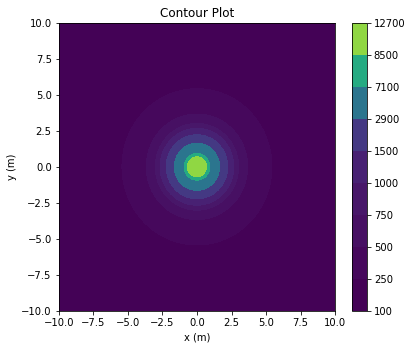

In [45]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(X, Y, Z_pred, levels = [100, 250, 500, 750, 1000, 1500, 2900, 7100, 8500, 12700], cmap = 'viridis')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

### Peak incident pressure contours

In [15]:
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}

In [16]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

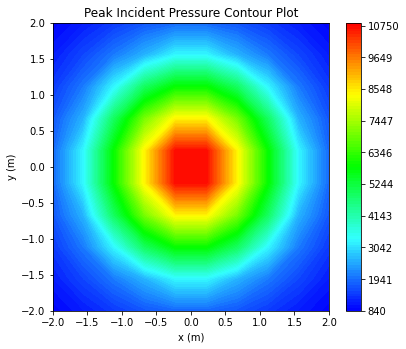

In [17]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
levels = np.linspace(840, 10850, 101)
cp = plt.contourf(X, Y, Z_pred, levels = levels, cmap = my_cmap)
plt.colorbar(cp)

ax.set_title('Peak Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()